In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control

### PT3 system with PI controller

The process is:

$$ P(s) = \frac{k}{(1 + T_1 s)(1 + T_2 s)(1 + T_3 s)}$$

the controller is:

$$ C(s) = K_p \left(1 + \frac{1}{T_i s} \right) = \frac{Kp(1+T_i s)}{T_i s} $$

In [47]:
# define the parameters
k = 2
T1 = 1
T2 = 1
T3 = 1

Kp = 1  # 1, 2, 2, 1
Ti = 10  # 1, 5, 10, 10

# open loop
# polynomials in the process
numP = k/T1/T2/T3
p = np.poly1d([-1/T1, -1/T2, -1/T3], r=True)
denP = p.coeffs
# polynomials in the controller
numC = np.array([Kp*Ti, Kp])
denC = np.array([Ti, 0])

P = control.tf(numP, denP)
C = control.tf(numC, denC)

In [48]:
# serial connection for G0
G0 = control.series(C, P)

In [49]:
G0


            20 s + 2
-------------------------------
10 s^4 + 30 s^3 + 30 s^2 + 10 s

In [50]:
# calculating Bode plot values
omega = np.logspace(-4,3,1000)
Mag, Phase, freq = control.bode(G0, omega, Plot=False)

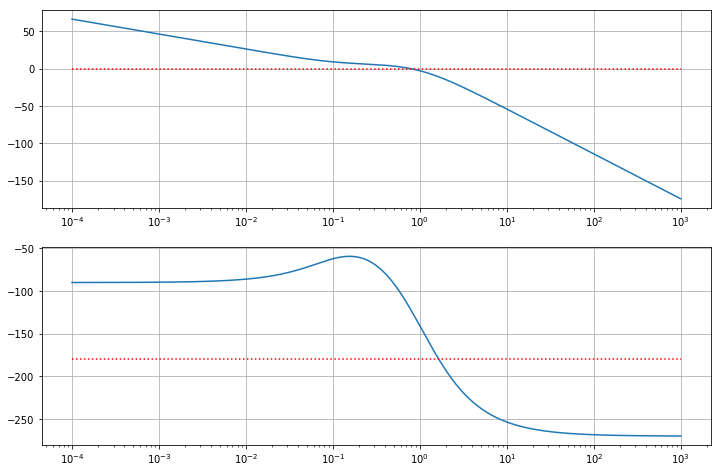

In [51]:
# plotting Bode
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.semilogx(freq,20*np.log10(Mag)), plt.grid(True)
plt.semilogx(freq, 0*Mag,'r:')
plt.subplot(2,1,2)
plt.semilogx(freq,np.degrees(Phase)), plt.grid(True)
plt.semilogx(freq, 0*Phase - 180,'r:');

In [52]:
# stability margins
control.stability_margins(G0)

(3.6048136935793065,
 59.59950772937532,
 0.5649059267346408,
 1.6542498186145296,
 0.7721571089910786,
 1.1769399753849785)

In [53]:
# stability margins
gm, pm, sm, gc, pc, sc = control.stability_margins(G0)
gm_dB = 20*np.log10(gm)
gm_dB

11.137656482682967

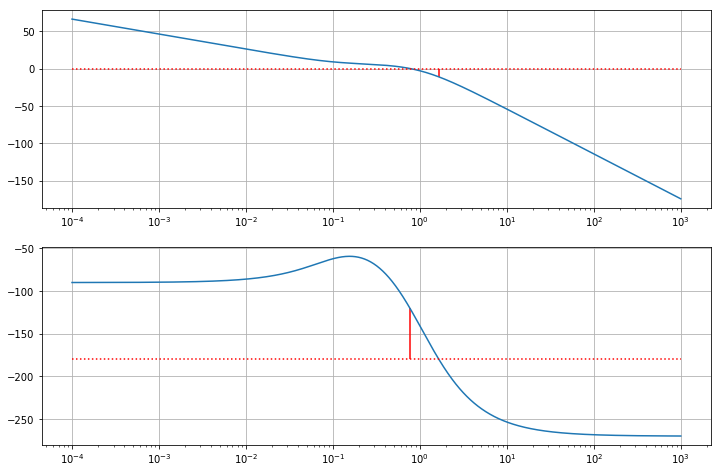

In [54]:
# plotting Bode with margin frequencies
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.semilogx(freq,20*np.log10(Mag)), plt.grid(True)
plt.semilogx(freq, 0*Mag,'r:')
plt.vlines(gc, -20*np.log10(gm), 0, colors='r')
plt.subplot(2,1,2)
plt.semilogx(freq,np.degrees(Phase)), plt.grid(True)
plt.semilogx(freq, 0*Phase - 180,'r:')
plt.vlines(pc, -180, -180 + pm, colors='r');

In [55]:
# calculating freq response
reG, imG, freq = control.nyquist(G0, omega, Plot=False)

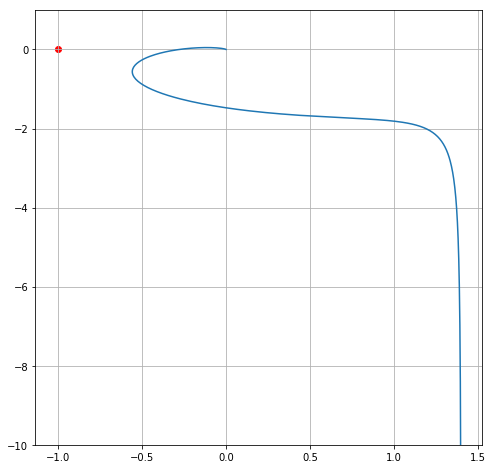

In [56]:
# plotting Nyquist
plt.figure(figsize=(8,8))
plt.plot(reG, imG), plt.grid(True)
plt.scatter(-1,0, color='r')
plt.ylim([-10,1]);

In [57]:
# the closed loop system
G = control.feedback(G0)

In [58]:
G


              20 s + 2
-----------------------------------
10 s^4 + 30 s^3 + 30 s^2 + 30 s + 2

In [59]:
time = np.linspace(0,50,1000)
t,y = control.step_response(G, time)

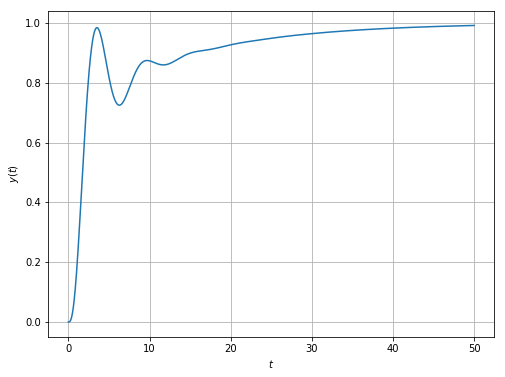

In [60]:
plt.figure(figsize=(8,6))
plt.plot(t, y), plt.grid(True)
plt.xlabel('$t$'), plt.ylabel('$y(t)$');